Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/sairam/Downloads/bank-additional_bank-additional-full.csv", sep=';',)

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df['y']=df['y'].map({'yes':1,'no':0})

In [8]:
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>,
        <AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

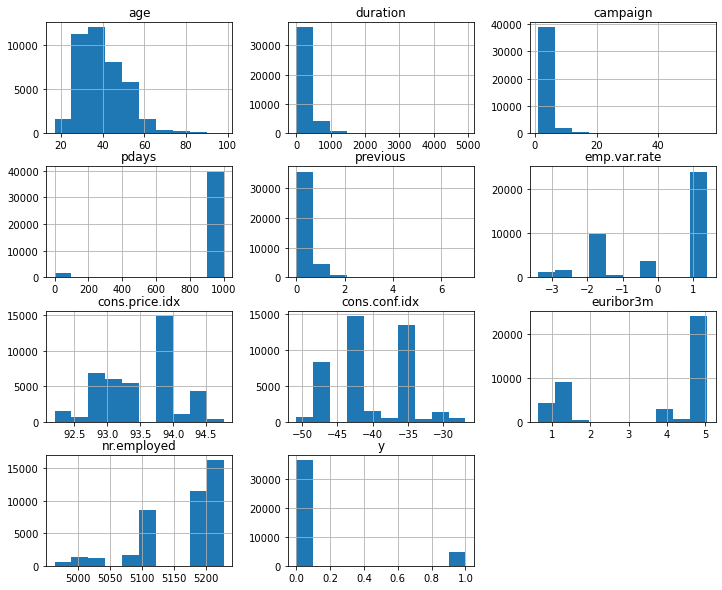

In [9]:
df.hist(figsize=(12,10))

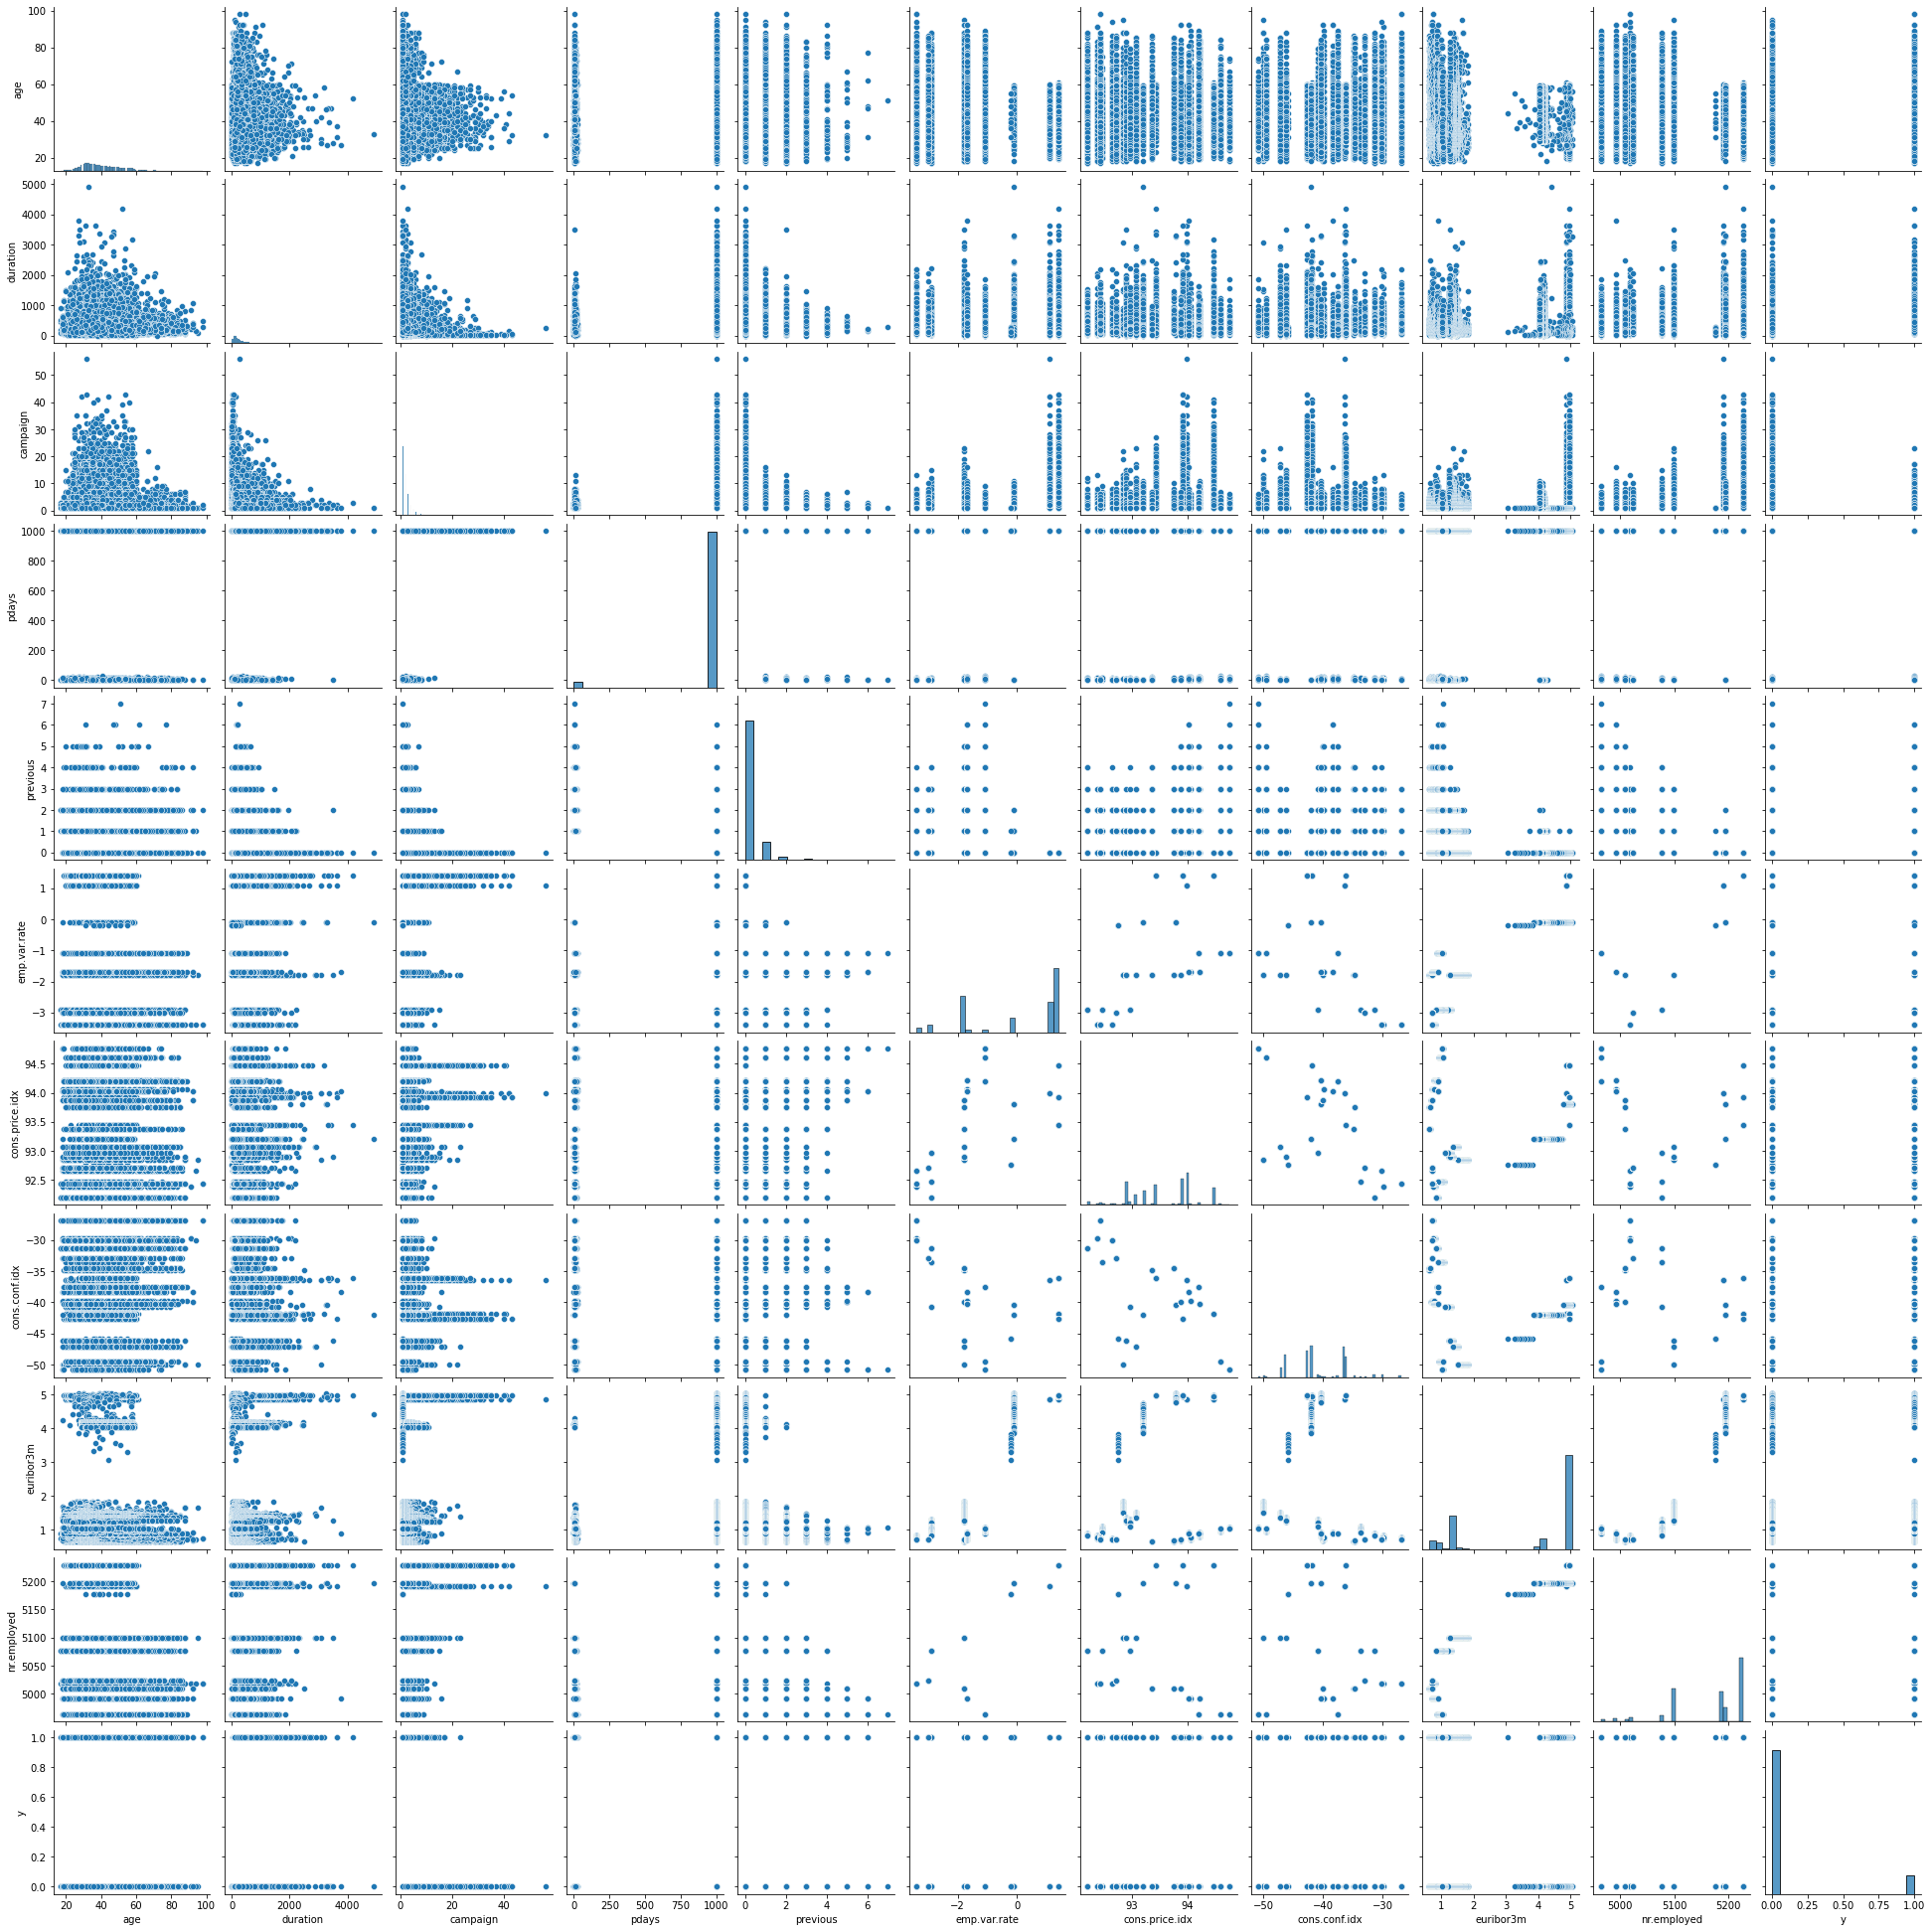

In [10]:
sns.pairplot(df)

In [11]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [12]:
df['y'].value_counts()/len(df)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [13]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='duration', ylabel='age'>,
        <AxesSubplot:xlabel='campaign', ylabel='age'>,
        <AxesSubplot:xlabel='pdays', ylabel='age'>,
        <AxesSubplot:xlabel='previous', ylabel='age'>,
        <AxesSubplot:xlabel='emp.var.rate', ylabel='age'>,
        <AxesSubplot:xlabel='cons.price.idx', ylabel='age'>,
        <AxesSubplot:xlabel='cons.conf.idx', ylabel='age'>,
        <AxesSubplot:xlabel='euribor3m', ylabel='age'>,
        <AxesSubplot:xlabel='nr.employed', ylabel='age'>,
        <AxesSubplot:xlabel='y', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='duration'>,
        <AxesSubplot:xlabel='duration', ylabel='duration'>,
        <AxesSubplot:xlabel='campaign', ylabel='duration'>,
        <AxesSubplot:xlabel='pdays', ylabel='duration'>,
        <AxesSubplot:xlabel='previous', ylabel='duration'>,
        <AxesSubplot:xlabel='emp.var.rate', ylabel='duration'>,
        <AxesSubplot:xlabel='cons.

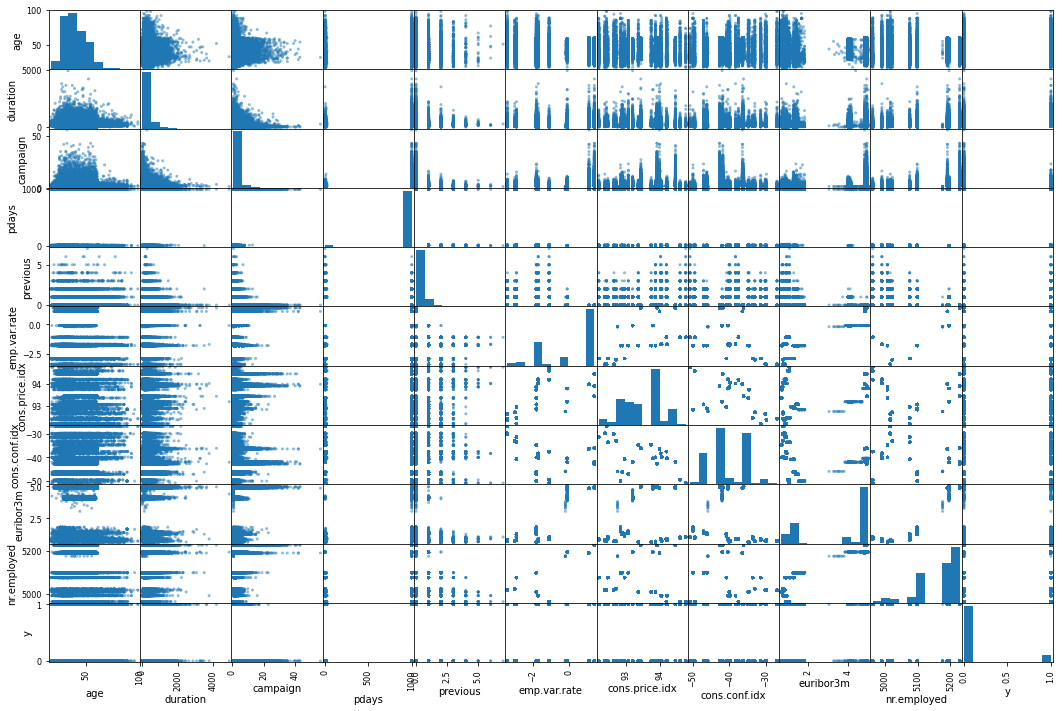

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(18,12))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

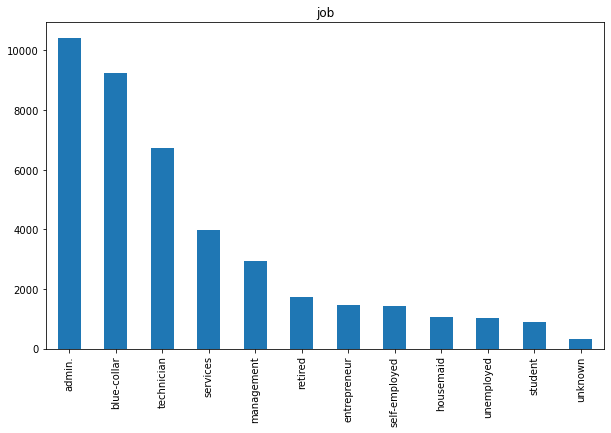

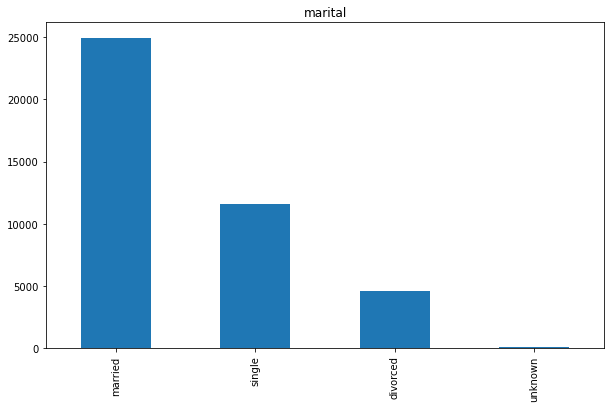

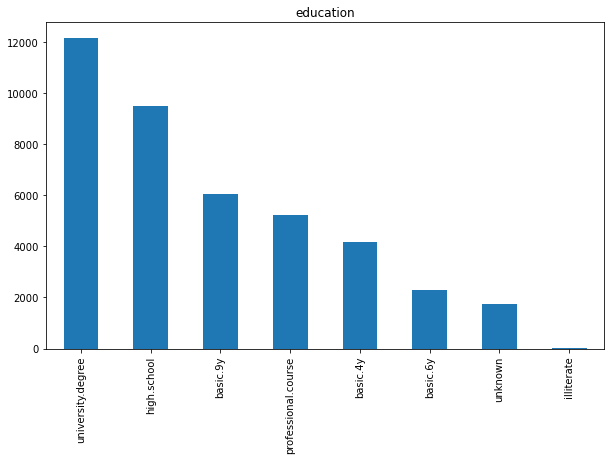

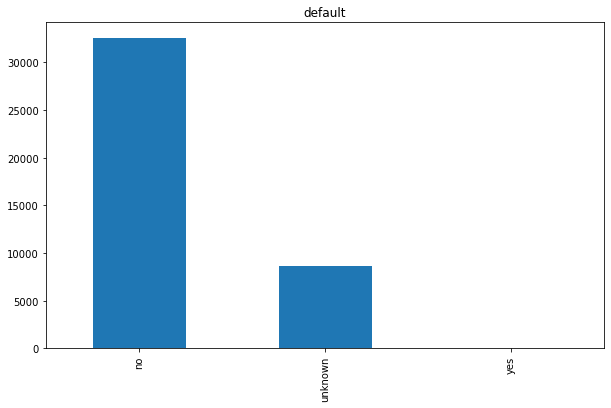

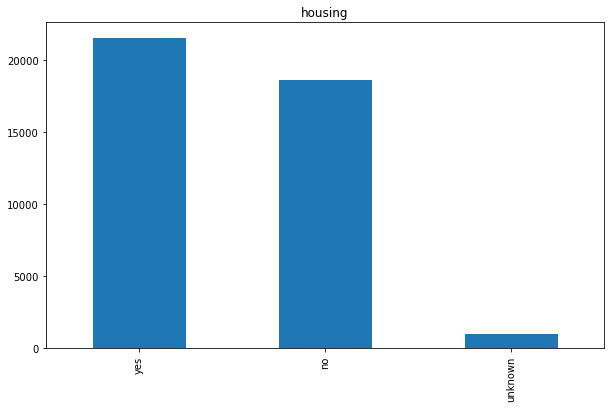

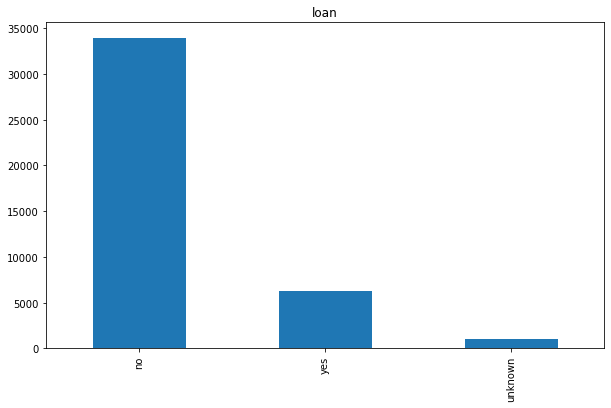

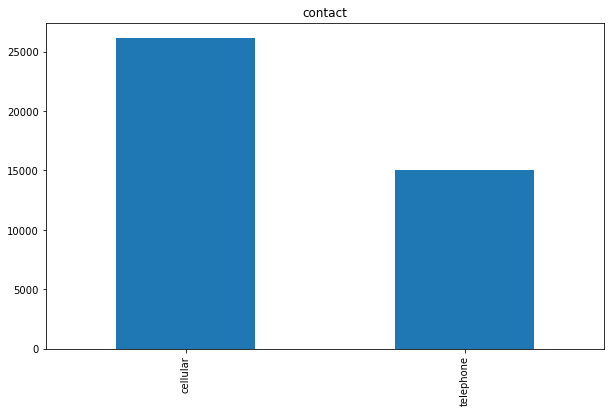

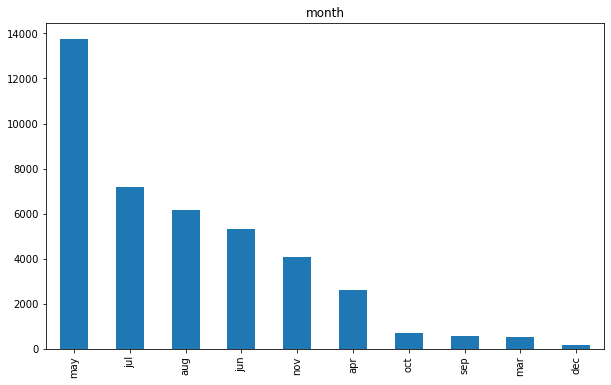

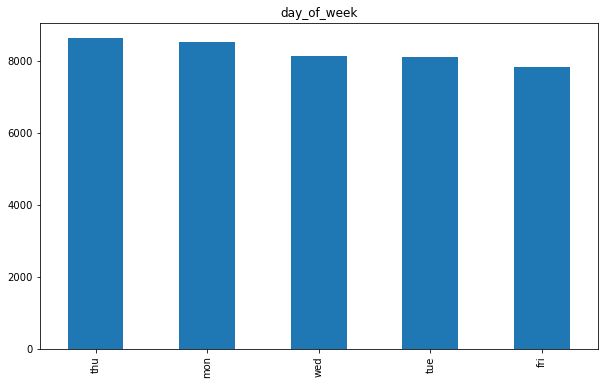

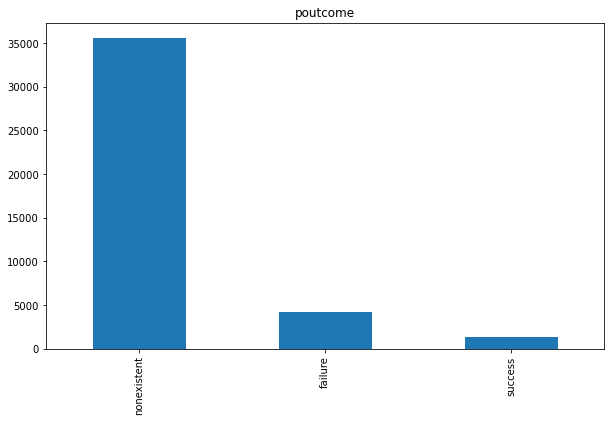

In [16]:
categorical=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for i in categorical:
    df[i].value_counts().plot(kind='bar',figsize=(10,6),title=i)
    plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numerical=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','euribor3m','nr.employed']
df[numerical]=scaler.fit_transform(df[numerical])

In [19]:
df_new=pd.get_dummies(df)
df_new=df_new.drop('duration',axis=1)

In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   campaign                       41188 non-null  float64
 2   pdays                          41188 non-null  float64
 3   previous                       41188 non-null  float64
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   y                              41188 non-null  int64  
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=18)
for train_index,test_index in split.split(df_new,df_new['y']):
    train_set=df_new.loc[train_index]
    test_set=df_new.loc[test_index]

In [22]:
train_set['y'].value_counts()

0    29238
1     3712
Name: y, dtype: int64

In [23]:
train_set['y'].value_counts()/len(train_set)

0    0.887344
1    0.112656
Name: y, dtype: float64

In [24]:
test_set['y'].value_counts()

0    7310
1     928
Name: y, dtype: int64

In [25]:
test_set['y'].value_counts()/len(test_set)

0    0.887351
1    0.112649
Name: y, dtype: float64

In [26]:
from sklearn.utils import resample
train_negative=train_set[train_set['y']==0]
train_positive=train_set[train_set['y']==1]
train_positive_upsample=resample(train_positive,replace=True,n_samples=29238,random_state=18)
train_upsample=pd.concat([train_negative,train_positive_upsample])
train_upsample['y'].value_counts()

0    29238
1    29238
Name: y, dtype: int64

In [27]:
train_upsample

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
15987,0.296296,0.036364,1.000000,0.000000,1.000000,0.669135,-42.7,0.980957,1.000000,0,...,0,0,0,0,0,1,0,0,1,0
28364,0.049383,0.036364,1.000000,0.000000,0.333333,0.340608,-47.1,0.181591,0.512287,0,...,0,0,0,0,1,0,0,0,1,0
17253,0.135802,0.000000,1.000000,0.000000,1.000000,0.669135,-42.7,0.981183,1.000000,0,...,0,0,1,0,0,0,0,0,1,0
40405,0.666667,0.000000,1.000000,0.000000,0.354167,0.711613,-38.3,0.061211,0.105860,0,...,0,0,0,0,1,0,0,0,1,0
10742,0.148148,0.018182,1.000000,0.000000,1.000000,0.882307,-41.8,0.980957,1.000000,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28022,0.160494,0.036364,1.000000,0.000000,0.333333,0.340608,-47.1,0.192473,0.512287,1,...,0,0,0,0,1,0,0,0,1,0
41077,0.345679,0.018182,0.005005,0.428571,0.479167,1.000000,-50.8,0.094310,0.000000,1,...,0,0,0,1,0,0,0,0,0,1
40352,0.370370,0.018182,1.000000,0.142857,0.354167,0.711613,-38.3,0.060077,0.105860,1,...,0,0,0,0,0,1,0,1,0,0
28598,0.506173,0.000000,1.000000,0.000000,0.333333,0.340608,-47.1,0.177057,0.512287,1,...,0,0,0,0,0,0,1,0,1,0


In [28]:
x_train=train_upsample.drop('y',axis=1)
x_test=test_set.drop('y',axis=1)
y_train=train_upsample['y']
y_test=test_set['y']

In [29]:
x_imb=train_set.drop('y',axis=1)
y_imb=train_set['y']

In [30]:
def fit_classifier(model,x,y,parameters=None,scorer_metrics=None):
    grid_obj=GridSearchCV(estimator=model,param_grid=parameters,scoring=make_scorer(scorer_metrics),cv=10)
    grid_fit=grid_obj.fit(x,y)
    model_estimator=grid_fit.best_estimator_
    model_estimator.fit(x,y)
    y_pred=model_estimator.predict(x)
    
    print("\n")
    print("Model performance on training set-----------")
    print("Final accuracy score on training data: {:.4f}".format(accuracy_score(y,y_pred)))
    print("Final precision score on training data: {:.4f}".format(precision_score(y,y_pred)))
    print("Final recall score on training data: {:.4f}".format(recall_score(y,y_pred)))
    print("Final ROC score on training data: {:.4f}".format(roc_auc_score(y,y_pred)))
    print("\n")
    print("The best parameters are: {}".format(model_estimator))
    return model_estimator

In [31]:
def classifier_test(model_fit,x,y):
    y_pred=model_fit.predict(x)
    print('\n')
    print("Model performance on testing set-----------")
    print("Final accuracy score on testing data:{:.4f}".format(accuracy_score(y,y_pred)))
    print("Final precision score on testing data:{:.4f}".format(precision_score(y,y_pred)))
    print("Final recall score on testing data:{:.4f}".format(recall_score(y,y_pred)))
    print("Final ROC score on testing data:{:.4f}".format(roc_auc_score(y,y_pred)))
    return y_pred

In [32]:
from sklearn.metrics import roc_curve
def roc_curve_plot(model,x,y,label=None):
    if label=='Neural Network':
        y_score=model.predict_proba(x)[:,0]
    else:
        y_score=model.predict_proba(x)[:,1]
    roc=roc_curve(y,y_score)
    plt.plot(roc[0],roc[1],label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    roc_score=auc(roc[0],roc[1])
    print("AUC score of %s is %.4f." %(label,roc_score))
    
    

In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [34]:
from sklearn.tree import DecisionTreeClassifier
parameters_dt={'max_depth':[6,7,8],'min_samples_split':[2,3],'min_samples_leaf':[2,3]}
model_dt=fit_classifier(DecisionTreeClassifier(random_state=18),x_train,y_train,parameters=parameters_dt,scorer_metrics=recall_score)



Model performance on training set-----------
Final accuracy score on training data: 0.7483
Final precision score on training data: 0.8234
Final recall score on training data: 0.6321
Final ROC score on training data: 0.7483


The best parameters are: DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, random_state=18)


In [35]:
y_test_dt=classifier_test(model_dt,x_test,y_test)



Model performance on testing set-----------
Final accuracy score on testing data:0.8383
Final precision score on testing data:0.3692
Final recall score on testing data:0.6142
Final ROC score on testing data:0.7405


In [36]:
joblib.dump(model_dt,'saved_models/Decision_Tree_model.pkl')

['saved_models/Decision_Tree_model.pkl']

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
parameters_lr={'C':[0.0006,0.0007,0.0008],'penalty':['l2']}
model_lr=fit_classifier(LogisticRegression(random_state=18),x_train,y_train,parameters=parameters_lr,scorer_metrics=recall_score)



Model performance on training set-----------
Final accuracy score on training data: 0.7306
Final precision score on training data: 0.7722
Final recall score on training data: 0.6540
Final ROC score on training data: 0.7306


The best parameters are: LogisticRegression(C=0.0006, random_state=18)


In [39]:
y_test_lr=classifier_test(model_lr,x_test,y_test)



Model performance on testing set-----------
Final accuracy score on testing data:0.7951
Final precision score on testing data:0.3079
Final recall score on testing data:0.6562
Final ROC score on testing data:0.7345


In [40]:
joblib.dump(model_lr,'saved_models/Logistic_Regression_model.pkl')

['saved_models/Logistic_Regression_model.pkl']

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
parameters_rf={'max_depth':[5,6,7],'min_samples_split':[2,3],'min_samples_leaf':[2,3]}

model_rf=fit_classifier(RandomForestClassifier(random_state=18),x_train,y_train,parameters=parameters_rf,scorer_metrics=recall_score)



Model performance on training set-----------
Final accuracy score on training data: 0.7427
Final precision score on training data: 0.7928
Final recall score on training data: 0.6570
Final ROC score on training data: 0.7427


The best parameters are: RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=18)


In [43]:
y_test_rf=classifier_test(model_rf,x_test,y_test)



Model performance on testing set-----------
Final accuracy score on testing data:0.8178
Final precision score on testing data:0.3391
Final recall score on testing data:0.6509
Final ROC score on testing data:0.7449


In [44]:
joblib.dump(model_rf,'saved_models/Random_Forest_model.pkl')

['saved_models/Random_Forest_model.pkl']

In [45]:
model_dt=joblib.load('saved_models/Decision_Tree_model.pkl')
model_lr=joblib.load('saved_models/Logistic_Regression_model.pkl')
model_rf=joblib.load('saved_models/Random_Forest_model.pkl')

In [46]:
model_dt.feature_importances_

array([2.64214977e-02, 1.21303978e-02, 3.28326325e-02, 2.35879885e-03,
       3.57158730e-04, 4.21599826e-02, 1.45700861e-01, 4.66359390e-02,
       6.15052003e-01, 3.03306567e-03, 0.00000000e+00, 0.00000000e+00,
       1.79538389e-03, 1.86296456e-03, 0.00000000e+00, 1.32806550e-03,
       1.05194987e-03, 8.75380844e-04, 1.90292795e-03, 0.00000000e+00,
       6.25078479e-04, 9.66574807e-04, 7.08089560e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.80652651e-04, 7.97342515e-05,
       0.00000000e+00, 0.00000000e+00, 3.59376176e-04, 3.05792438e-03,
       8.44065084e-04, 1.28421338e-02, 2.41425090e-03, 0.00000000e+00,
       4.81284253e-04, 0.00000000e+00, 1.94662763e-03, 0.00000000e+00,
       5.34820260e-04, 0.00000000e+00, 4.61833695e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.26188984e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.03830598e-02, 0.00000000e+00, 0.00000000e+00, 4.70367724e-03,
      

In [47]:
model_rf.feature_importances_

array([1.20139070e-02, 3.97037681e-03, 6.32830129e-02, 3.22586007e-02,
       1.22551948e-01, 6.59307122e-02, 7.30312588e-02, 1.39380955e-01,
       2.20900654e-01, 2.80044029e-04, 4.91431157e-03, 1.15683480e-04,
       2.28288456e-04, 2.03008274e-04, 1.76738243e-03, 2.39700505e-04,
       3.07137752e-04, 2.21235382e-03, 8.72385501e-05, 1.38305683e-05,
       1.39012378e-04, 1.18425989e-04, 1.60113254e-04, 1.45936092e-03,
       3.15196331e-05, 1.87226844e-04, 9.94670708e-05, 1.11841116e-03,
       1.82436971e-04, 0.00000000e+00, 1.56656955e-04, 1.70558615e-03,
       1.06163924e-04, 1.31084379e-02, 6.60180746e-03, 0.00000000e+00,
       2.15161062e-04, 6.71774126e-05, 1.78252918e-04, 1.10820140e-04,
       7.17227487e-05, 1.30404623e-04, 3.95616688e-02, 1.39199398e-02,
       8.96004162e-03, 1.79809499e-03, 3.75326180e-05, 1.38169805e-03,
       2.60778331e-03, 1.07564747e-02, 2.22158776e-02, 2.27216104e-03,
       1.03562426e-02, 3.25306368e-03, 3.90014500e-04, 8.96711617e-04,
      

In [48]:
from sklearn.metrics import auc

AUC score of Decision_Tree is 0.8063.
AUC score of Logistic_Regression is 0.7877.
AUC score of Ranodm_Forest is 0.8012.


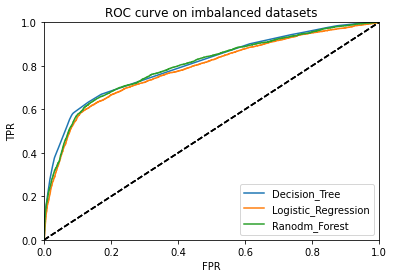

In [49]:
roc_curve_plot(model_dt,x_imb,y_imb,label='Decision_Tree')
roc_curve_plot(model_lr,x_imb,y_imb,label='Logistic_Regression')
roc_curve_plot(model_rf,x_imb,y_imb,label='Ranodm_Forest')
plt.title("ROC curve on imbalanced datasets")
plt.legend(loc='lower right')

AUC score of DecisionTree is 0.7669.
AUC score of Logistic_Regression is 0.7823.
AUC score of Ranodm_Forest is 0.7865.


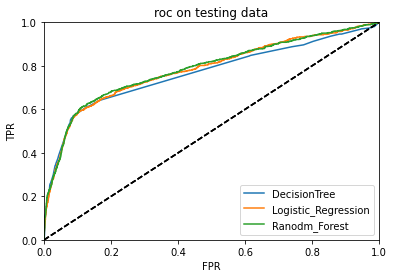

In [50]:
roc_curve_plot(model_dt,x_test,y_test,label='DecisionTree')
roc_curve_plot(model_lr,x_test,y_test,label='Logistic_Regression')
roc_curve_plot(model_rf,x_test,y_test,label='Ranodm_Forest')
plt.title("roc on testing data")
plt.legend(loc="lower right")

In [51]:
parameters_dt_imp={'max_depth':[5,6,7],'min_samples_split':[2,3],'min_samples_leaf':[2,3],'criterion':['gini','entropy'],'splitter':['best','random'],'max_features':[None,'auto','sqrt','log2'],'class_weight':[None,'balanced']}
model_dt_imp=fit_classifier(DecisionTreeClassifier(random_state=18),x_train,y_train,parameters=parameters_dt_imp,scorer_metrics=recall_score)



Model performance on training set-----------
Final accuracy score on training data: 0.7323
Final precision score on training data: 0.7686
Final recall score on training data: 0.6647
Final ROC score on training data: 0.7323


The best parameters are: DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                       max_features='auto', min_samples_leaf=3, random_state=18,
                       splitter='random')


In [52]:
y_test_dt_imp=classifier_test(model_dt_imp,x_test,y_test)



Model performance on testing set-----------
Final accuracy score on testing data:0.7840
Final precision score on testing data:0.2925
Final recall score on testing data:0.6466
Final ROC score on testing data:0.7240


In [53]:
joblib.dump(model_dt_imp,'saved_models/Decision_Tree_imp_model.pkl')


['saved_models/Decision_Tree_imp_model.pkl']

In [54]:
model_dt_imp=joblib.load('saved_models/Decision_Tree_imp_model.pkl')

AUC score of Decisoin_Tree is 0.8063.
AUC score of DecisionTreeImprovised is 0.7938.


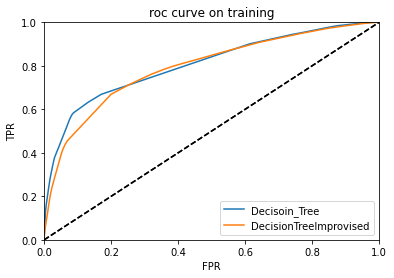

In [55]:
roc_curve_plot(model_dt,x_imb,y_imb,label='Decisoin_Tree')
roc_curve_plot(model_dt_imp,x_imb,y_imb,label='DecisionTreeImprovised')
plt.title("roc curve on training")
plt.legend(loc='lower right')

AUC score of Decision_Tree is 0.7865.
AUC score of DecisionTreeIMprovised is 0.7865.


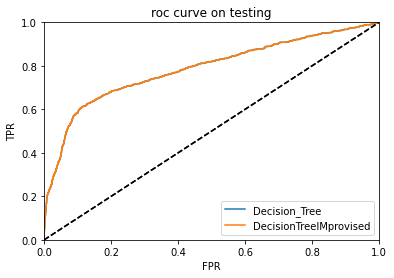

In [56]:
roc_curve_plot(model_rf,x_test,y_test,label='Decision_Tree')
roc_curve_plot(model_rf,x_test,y_test,label='DecisionTreeIMprovised')
plt.title("roc curve on testing")
plt.legend(loc="lower right")

In [57]:
joblib.dump(model_dt_imp,'saved_models/final_model.pkl')

['saved_models/final_model.pkl']

In [58]:
x_train.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

Text(0, 0.5, 'Importance contribution %')

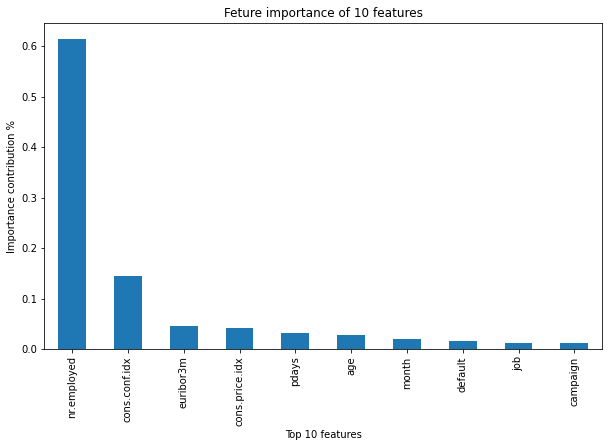

In [59]:
series_feature=pd.Series(index=x_train.columns,data=model_dt.feature_importances_.reshape(62,))
feature_dict={}
for i in df.columns[:-1]:
    feature_dict[i]=0
for i in series_feature.index:
    for j in feature_dict.keys():
        if j in i:
            feature_dict[j]+=series_feature[i]
        else:
            continue
series_feature=pd.Series(feature_dict)
feature_sort=series_feature.sort_values(ascending=False)
feature_sort[0:10].plot.bar(figsize=(10,6))
plt.title("Feture importance of 10 features")
plt.xlabel("Top 10 features")
plt.ylabel("Importance contribution %")


In [60]:
feature_dict

{'age': 0.028284462308764906,
 'job': 0.01247481676122689,
 'marital': 0.0016746643669922723,
 'education': 0.004721752539640795,
 'default': 0.015256384737177336,
 'housing': 0.0024279118830596606,
 'loan': 0.0005348202599723636,
 'contact': 0.004618336952088021,
 'month': 0.020509248775140092,
 'day_of_week': 0.0060062151171714415,
 'duration': 0,
 'campaign': 0.012130397769557072,
 'pdays': 0.03283263246784103,
 'previous': 0.0023587988521404724,
 'poutcome': 0.008126577932632655,
 'emp.var.rate': 0.0003571587304759229,
 'cons.price.idx': 0.04215998259300425,
 'cons.conf.idx': 0.14570086057350584,
 'euribor3m': 0.04663593897716386,
 'nr.employed': 0.6150520029638759}